## Prepare data for MDD and imaging - Volve data

In [1]:
# env: UR_RM
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

from subroutine.wavefieldsepforp import wavefield_sepforp

## Data loading

In [2]:
# data
inputfile = '/home/wangn0e/2022-2023/first_research/dataset/volve_processed_withdir_fmax30.npz'
inputdata = np.load(inputfile)

# Receivers
r = inputdata['r']
dr = np.mean(np.abs(np.diff(r[0])))
nr = r.shape[1]

# Sources
s = inputdata['s']
ds = np.mean(np.abs(np.diff(s[0])))
ns = s.shape[1]

# velocity
vel = inputdata['vel'].T

# Time axis
t = inputdata['t']
ot, dt, nt = t[0], t[1]-t[0], len(t)

# # Axes
x, z = inputdata['x'], inputdata['z']

# data
p = inputdata['p']
vz = inputdata['vz']


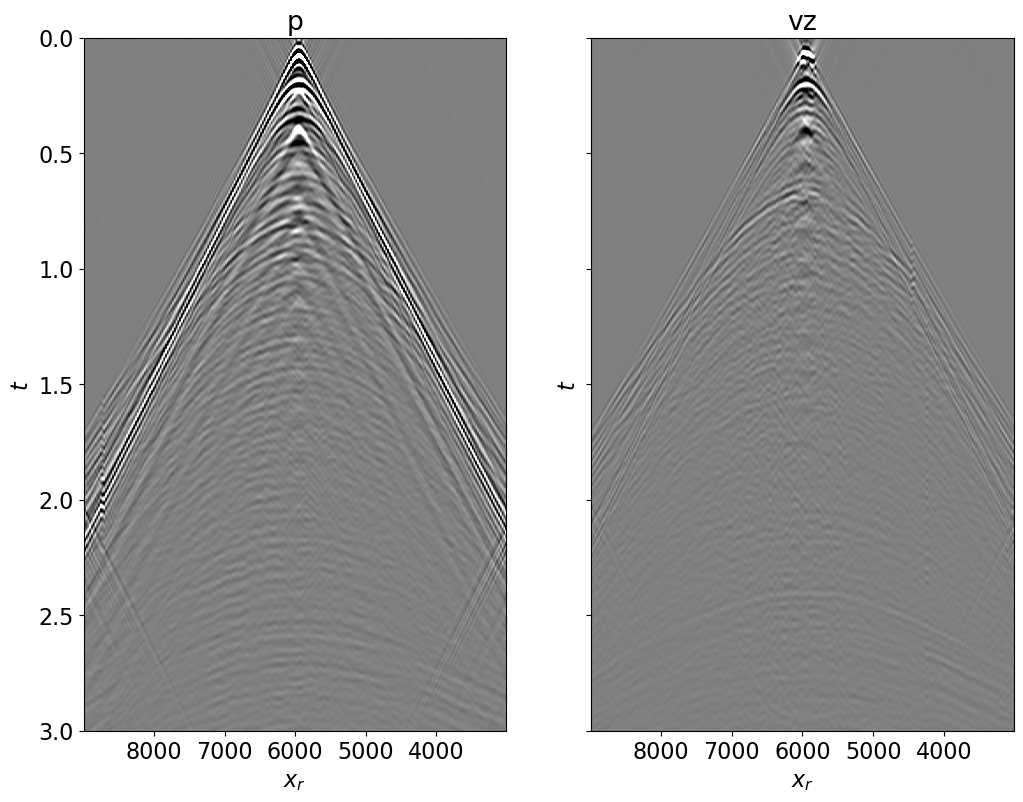

In [3]:
clip = 0.05
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(12, 9))
# fig.suptitle('wavefield separation at source side')
axs[0].imshow(p[ns//2].T, cmap='gray', vmin=-clip*np.abs(p).max(), 
              vmax=clip*np.abs(p).max(), extent=(r[0,0], r[0,-1], t[-1], t[0]))
axs[0].set_title('p'), axs[0].set_xlabel(r'$x_r$'), axs[0].set_ylabel(r'$t$')
axs[0].axis('tight')
axs[1].imshow(vz[ns//2].T, cmap='gray', vmin=-clip*np.abs(vz).max(), 
              vmax=clip*np.abs(vz).max(), extent=(r[0,0], r[0,-1], t[-1], t[0]))
axs[1].set_title('vz'), axs[1].set_xlabel(r'$x_r$'), axs[1].set_ylabel(r'$t$')
axs[1].axis('tight')
axs[1].set_ylim(3,0);

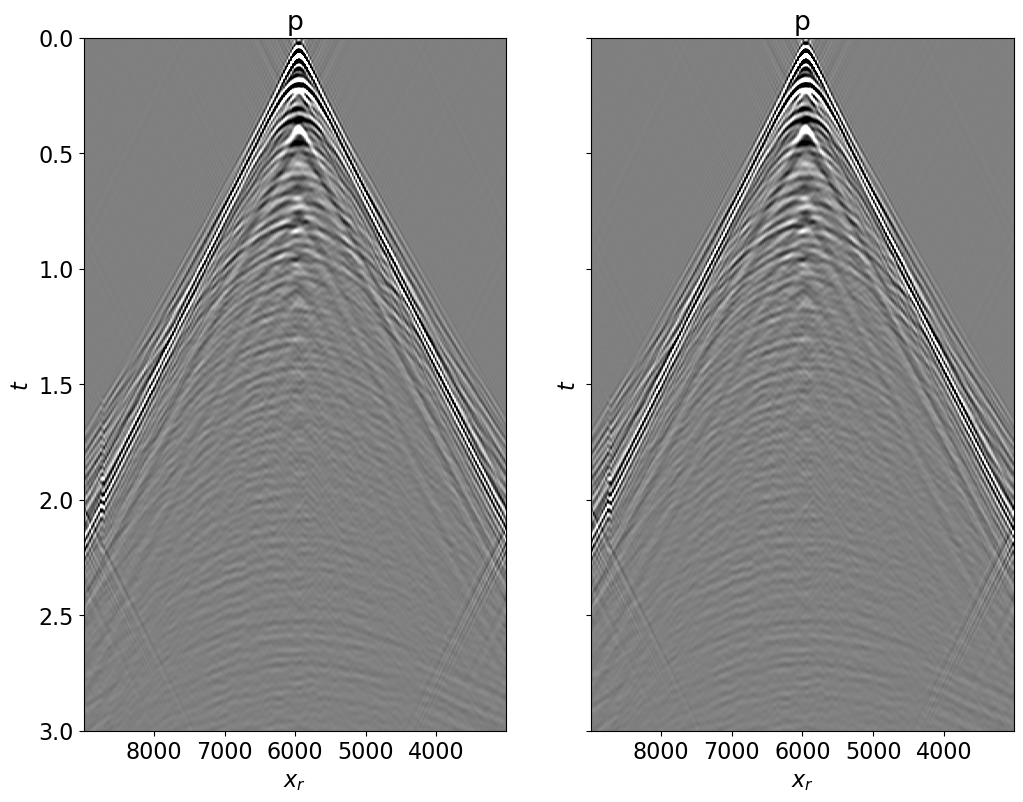

In [4]:
clip = 0.05
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(12, 9))
# fig.suptitle('wavefield separation at receiver side')
axs[0].imshow(p[ns//2].T, cmap='gray', vmin=-clip*np.abs(p).max(), 
              vmax=clip*np.abs(p).max(), extent=(r[0,0], r[0,-1], t[-1], t[0]))
axs[0].set_title('p'), axs[0].set_xlabel(r'$x_r$'), axs[0].set_ylabel(r'$t$')
axs[0].axis('tight')
axs[1].imshow(p[ns//2].T, cmap='gray', vmin=-clip*np.abs(p).max(), 
              vmax=clip*np.abs(p).max(), extent=(r[0,0], r[0,-1], t[-1], t[0]))
axs[1].set_title('p'), axs[1].set_xlabel(r'$x_r$'), axs[1].set_ylabel(r'$t$')
axs[1].axis('tight')
axs[1].set_ylim(3,0);

## wavefield separation for data at receiver side, should be arranged as (ns,nr,nt)

In [5]:
# velocity and density along source array
rho_s = 1000.0 
vel_s = np.mean(vel[1])
print('vel_s = ', vel_s)

# velocity and density along receiver array
rho_r = 1200.0 
vel_r = np.mean(vel[5])
print('vel_r = ', vel_r)

vel_s =  1480.0
vel_r =  1663.7637


In [6]:
# calibration
vz_cali = vz/50000       # organized as (S, R, T)

Working with source 0
Working with source 1
Working with source 2
Working with source 3
Working with source 4
Working with source 5
Working with source 6
Working with source 7
Working with source 8
Working with source 9
Working with source 10
Working with source 11
Working with source 12
Working with source 13
Working with source 14
Working with source 15
Working with source 16
Working with source 17
Working with source 18
Working with source 19
Working with source 20
Working with source 21
Working with source 22
Working with source 23
Working with source 24
Working with source 25
Working with source 26
Working with source 27
Working with source 28
Working with source 29
Working with source 30
Working with source 31
Working with source 32
Working with source 33
Working with source 34
Working with source 35
Working with source 36
Working with source 37
Working with source 38
Working with source 39
Working with source 40
Working with source 41
Working with source 42
Working with source 4

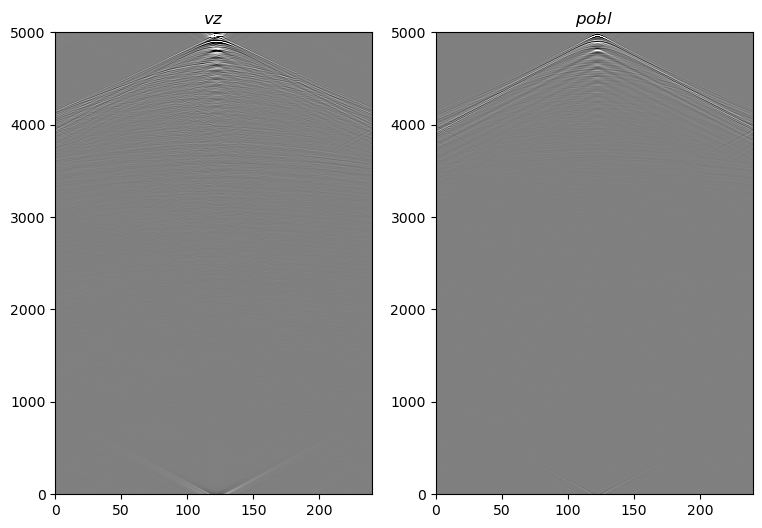

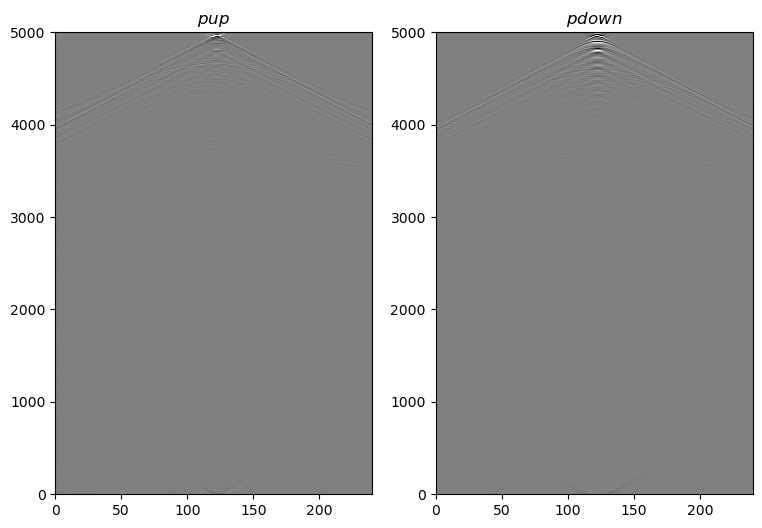

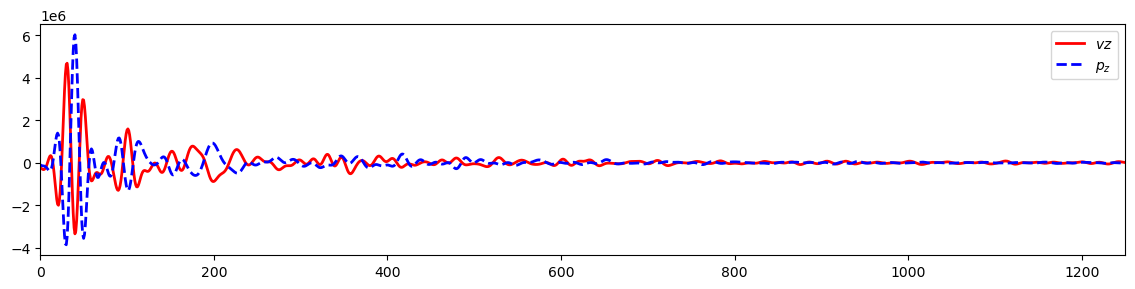

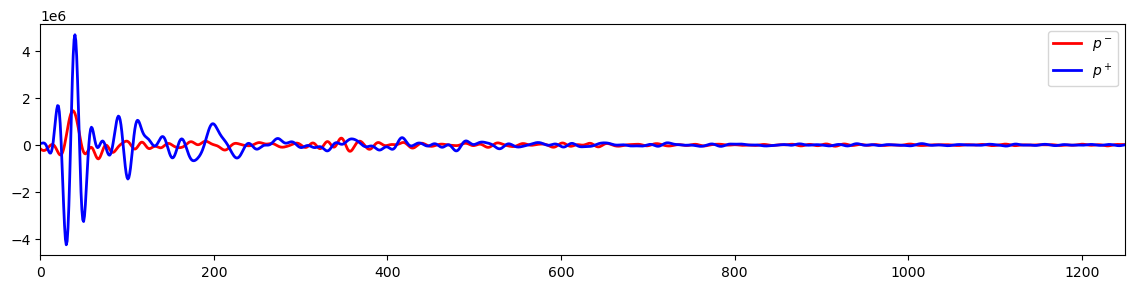

In [8]:
# wavefield seprate for p
nffts = (2**13, 2**13)
pup, pdown =wavefield_sepforp(vz_cali, p, dt, dr, rho_r, vel_r, nffts=nffts,
                                       critical=110, ntaper=10, verb=True, plotflag=True)

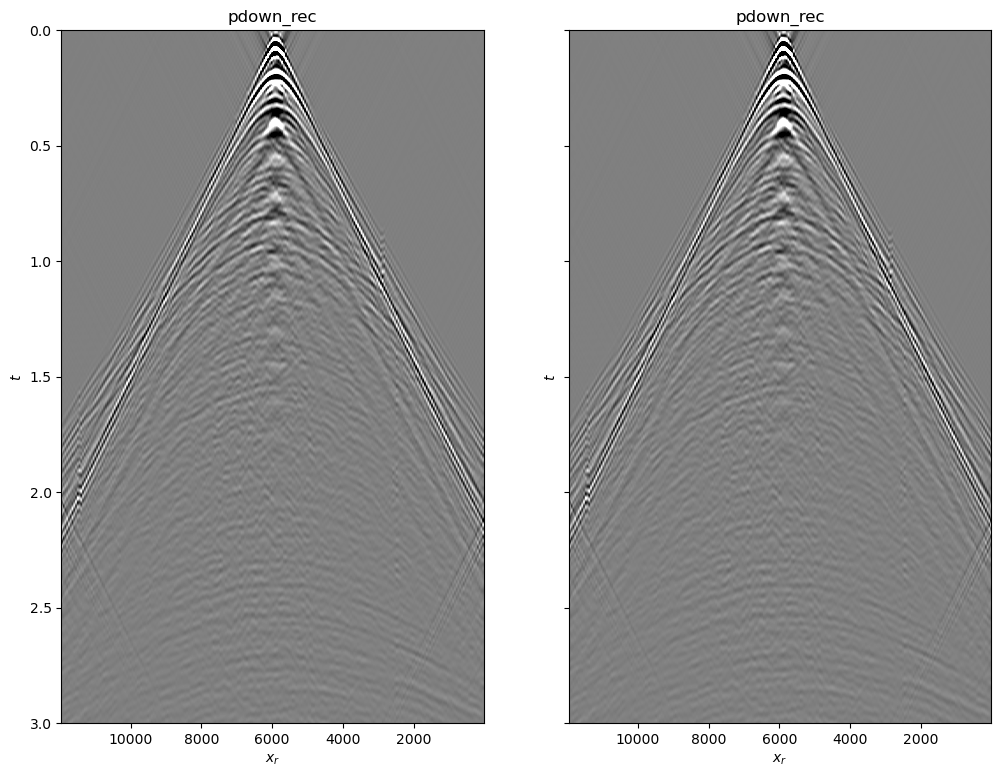

In [9]:
# nffts = (2**13, 2**13) 
clip = 0.05
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(12, 9))
# fig.suptitle('wavefield separation at receiver side')
axs[0].imshow(pdown[ns//2].T, cmap='gray', vmin=-clip*np.abs(pdown).max(), 
              vmax=clip*np.abs(pdown).max(), extent=(s[0,0], s[0,-1], t[-1], t[0]))
axs[0].set_title('pdown_rec'), axs[0].set_xlabel(r'$x_r$'), axs[0].set_ylabel(r'$t$')
axs[0].axis('tight')
axs[1].imshow(pdown[ns//2].T, cmap='gray', vmin=-clip*np.abs(pdown).max(), 
              vmax=clip*np.abs(pdown).max(), extent=(s[0,0], s[0,-1], t[-1], t[0]))
axs[1].set_title('pdown_rec'), axs[1].set_xlabel(r'$x_r$'), axs[1].set_ylabel(r'$t$')
axs[1].axis('tight')
axs[1].set_ylim(3,0);

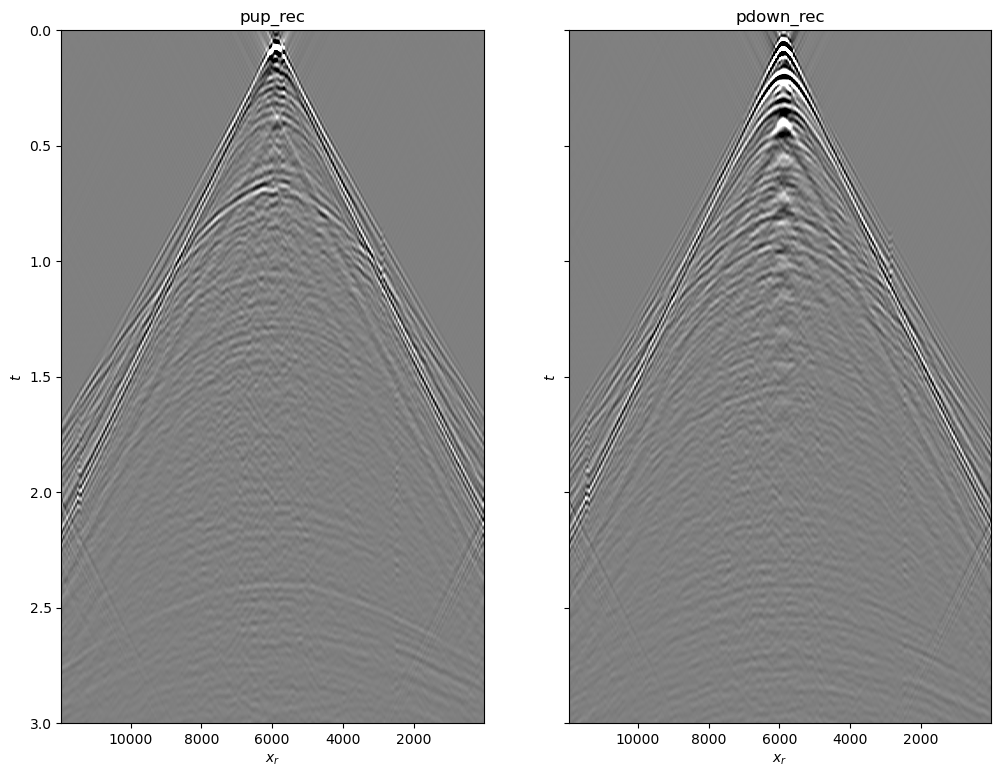

In [10]:
# nffts = (2**13, 2**13) 
clip = 0.05
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(12, 9))
# fig.suptitle('wavefield separation at receiver side')
axs[0].imshow(pup[ns//2].T, cmap='gray', vmin=-clip*np.abs(p).max(), 
              vmax=clip*np.abs(p).max(), extent=(s[0,0], s[0,-1], t[-1], t[0]))
axs[0].set_title('pup_rec'), axs[0].set_xlabel(r'$x_r$'), axs[0].set_ylabel(r'$t$')
axs[0].axis('tight')
axs[1].imshow(pdown[ns//2].T, cmap='gray', vmin=-clip*np.abs(p).max(), 
              vmax=clip*np.abs(p).max(), extent=(s[0,0], s[0,-1], t[-1], t[0]))
axs[1].set_title('pdown_rec'), axs[1].set_xlabel(r'$x_r$'), axs[1].set_ylabel(r'$t$')
axs[1].axis('tight')
axs[1].set_ylim(3,0);

In [12]:
pupi   = pup.transpose(0, 2, 1)    # organized as  (s, r, t)->(s, t, r)
pdowni = pdown.transpose(0, 2, 1)  # organized as  (s, r, t)->(s, t, r)

In [13]:
p = pupi+pdowni

p_zo = np.zeros((ns, nt))
pup_zo = np.zeros((ns, nt))
pdown_zo = np.zeros((ns, nt))

for isrc in range(nr):
    irec_zo = np.argmin(np.abs(s[0, isrc]-r[0]))
    p_zo[isrc] = p[isrc, :, irec_zo]
    pup_zo[isrc], pdown_zo[isrc] = pupi[isrc, :, irec_zo], pdowni[isrc, :, irec_zo]

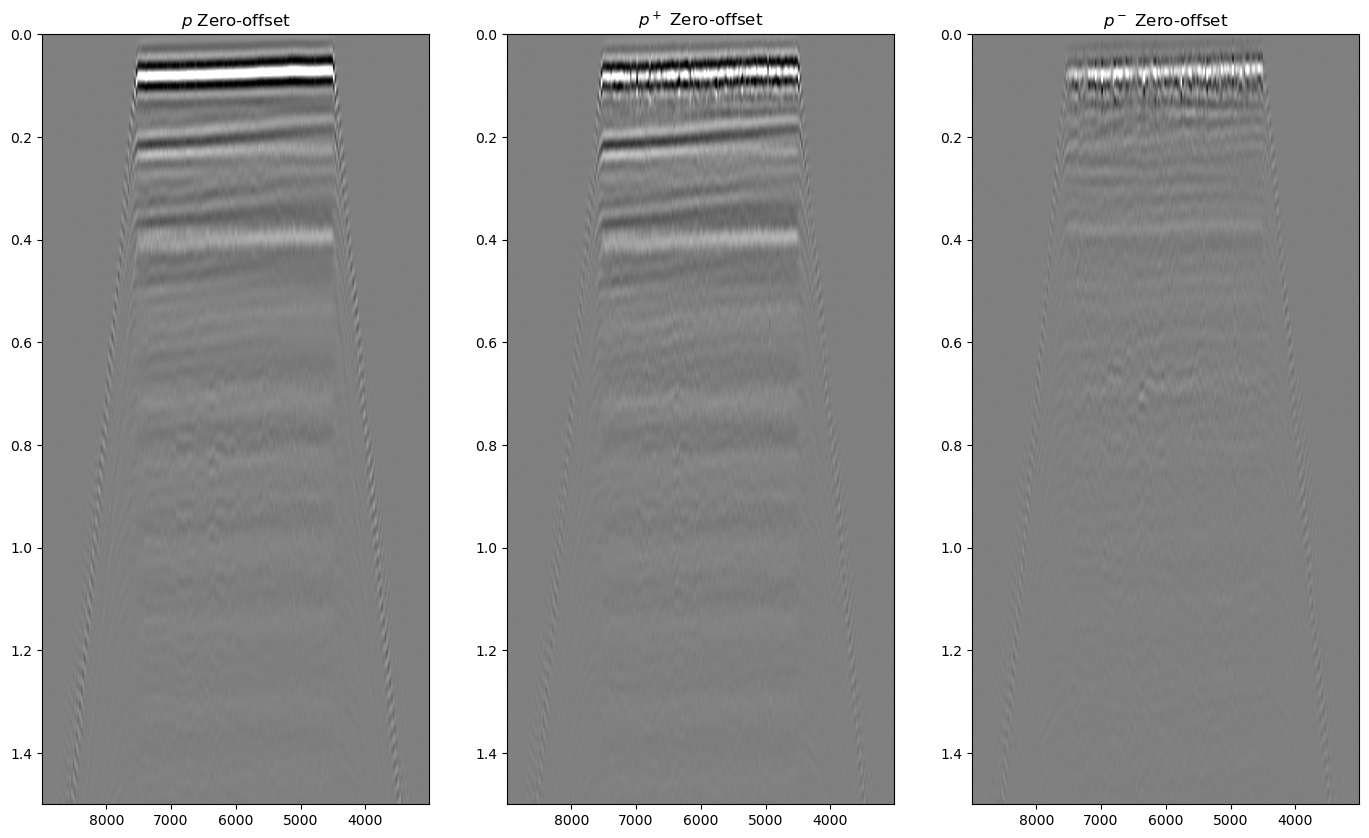

In [14]:
clip=0.5
fig, axs = plt.subplots(1, 3, figsize=(17,10))
axs[0].imshow(p_zo.T, cmap='gray', vmin=-clip*np.abs(p_zo).max(), vmax=clip*np.abs(p_zo).max(),
              extent = (r[0, 0], r[0,-1], t[-1], t[0]))
axs[0].set_title(r'$p$ Zero-offset')
axs[0].axis('tight')
axs[0].set_ylim(1.5, 0)
axs[1].imshow(pdown_zo.T, cmap='gray', vmin=-clip*np.abs(p_zo).max(), vmax=clip*np.abs(p_zo).max(),
              extent = (r[0,0], r[0,-1], t[-1], t[0]))
axs[1].set_title(r'$p^+$ Zero-offset')
axs[1].axis('tight')
axs[1].set_ylim(1.5, 0)
axs[2].imshow(pup_zo.T, cmap='gray', vmin=-clip*np.abs(p_zo).max(), vmax=clip*np.abs(p_zo).max(),
              extent = (r[0,0], r[0,-1], t[-1], t[0]))
axs[2].set_title(r'$p^-$ Zero-offset')
axs[2].axis('tight')
axs[2].set_ylim(1.5, 0);

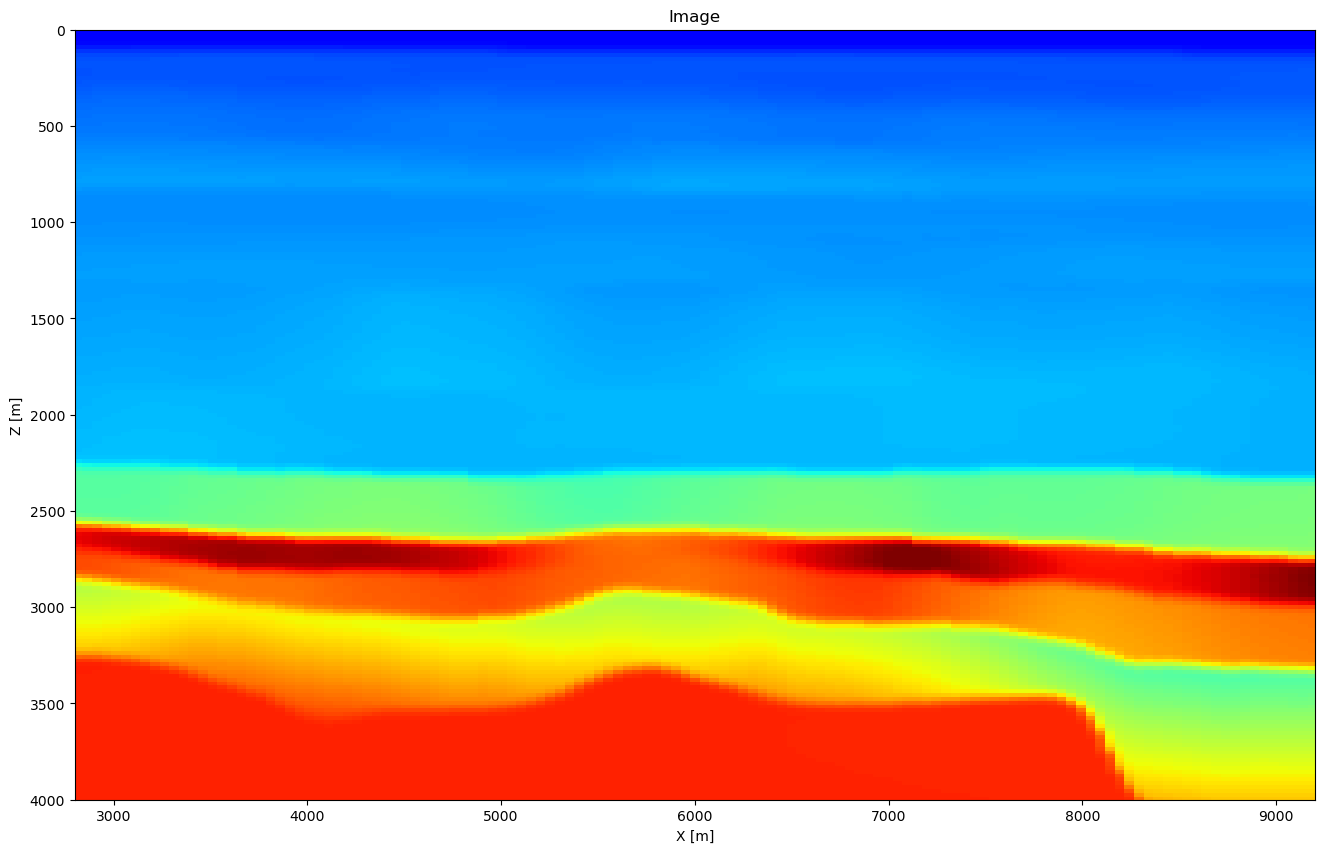

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
im = ax.imshow(vel, cmap='jet', vmin=1000, vmax=5000, extent=(x[0], x[-1], z[-1], z[0]))
ax.set_xlabel(r'X [m]')
ax.set_ylabel(r'Z [m]')
ax.set_title(r'Image')
ax.axis('tight')
ax.set_xlim(2800, 9200)
ax.set_ylim(4000, 0);

In [16]:
np.savez_compressed('/home/wangn0e/2022-2023/first_research/dataset/volve_pdown_rec_full_fmax30', p=pdown, x=x, z=z, r=r, s=s, vel=vel, t=t)